In [3]:
import xarray as xr
import xskillscore

from benchmark.bm.ensemble_score import get_entropy_of_distributions
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.gridspec as gridspec
import matplotlib

from WD.plotting import plot_map

import cartopy.crs as ccrs

In [1]:
import numpy as np

array([8, 6, 9, 7, 2])

In [4]:
# usually this would go on top of the notebook:
plt.rcParams.update({'font.size': 8})  # sets font size for all cells
plt.rcParams['figure.dpi'] = 300  # sets dpi for all cells

alphabet_letters = np.array(list(map(chr, range(65, 91))))  # used for labelling subplots
textwidth = 144  # in mm
mm_to_inch = 0.0393701
textwidth = textwidth * mm_to_inch # textwidth in inches

In [5]:
ds_id_2 = "278771"
ds_id_3 = "13B689"

# model_id_1 = "DC855F"
model_id_2 = "98B278"
model_id_3 = "B3989F"

# targets_1 = xr.load_dataset(f"/data/compoundx/WeatherDiff/model_output/{ds_id}/{model_id_1}_target.nc")
# predictions_1 = xr.load_dataset(f"/data/compoundx/WeatherDiff/model_output/{ds_id}/{model_id_1}_gen.nc")

targets_2 = xr.load_dataset(f"/data/compoundx/WeatherDiff/model_output/{ds_id_2}/{model_id_2}_target.nc")
predictions_2 = xr.load_dataset(f"/data/compoundx/WeatherDiff/model_output/{ds_id_2}/{model_id_2}_gen.nc")

targets_3 = xr.load_dataset(f"/data/compoundx/WeatherDiff/model_output/{ds_id_3}/{model_id_3}_target.nc")
predictions_3 = xr.load_dataset(f"/data/compoundx/WeatherDiff/model_output/{ds_id_3}/{model_id_3}_gen.nc")

In [60]:
ranks = xskillscore.rank_histogram(targets_3.isel({"ensemble_member":0}), predictions_3, member_dim="ensemble_member", dim=["init_time", "lead_time"])
crps = xskillscore.crps_ensemble(targets_3.isel({"ensemble_member":0}), predictions_3, member_dim="ensemble_member", dim=["init_time", "lead_time"])

In [10]:
S = get_entropy_of_distributions(ranks)

S

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64)
Coordinates:
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
Data variables:
    t        (lat, lon) float64 1.234 1.243 1.242 1.252 ... 1.275 1.277 1.28
    t2m      (lat, lon) float64 1.243 1.252 1.262 1.272 ... 1.406 1.408 1.403
    z        (lat, lon) float64 1.078 1.076 1.063 1.049 ... 1.085 1.095 1.106

In [77]:
# do configurations for plotting - these can also be shared or "inherited" for plots that are similar!

config = {
    "CMAP": "Greens",
    "NORM": matplotlib.colors.Normalize(vmin=1, vmax=np.log(len(predictions_3.ensemble_member)+1)),
    "RASTERIZED": True, # don't plot map pixels as individual points to make created files smaller
    "SHOW_COLORBAR": False,
    "CBAR_ORIENTATION": "horizontal",
    "CBAR_EXTEND": "neither",
    "SHOW_COLORBAR_LABEL": False,
    "CBAR_LABEL": "Entropy",
    "TITLE_FONTSIZE": 8,
    "PROJECTION": ccrs.Robinson(), # this is not called by plot_map, but by the function we create the entire plot with.
    "ASPECT_RATIO": 9/5  # can be used to calculate a figsize that looks nice for a given type of plot
}

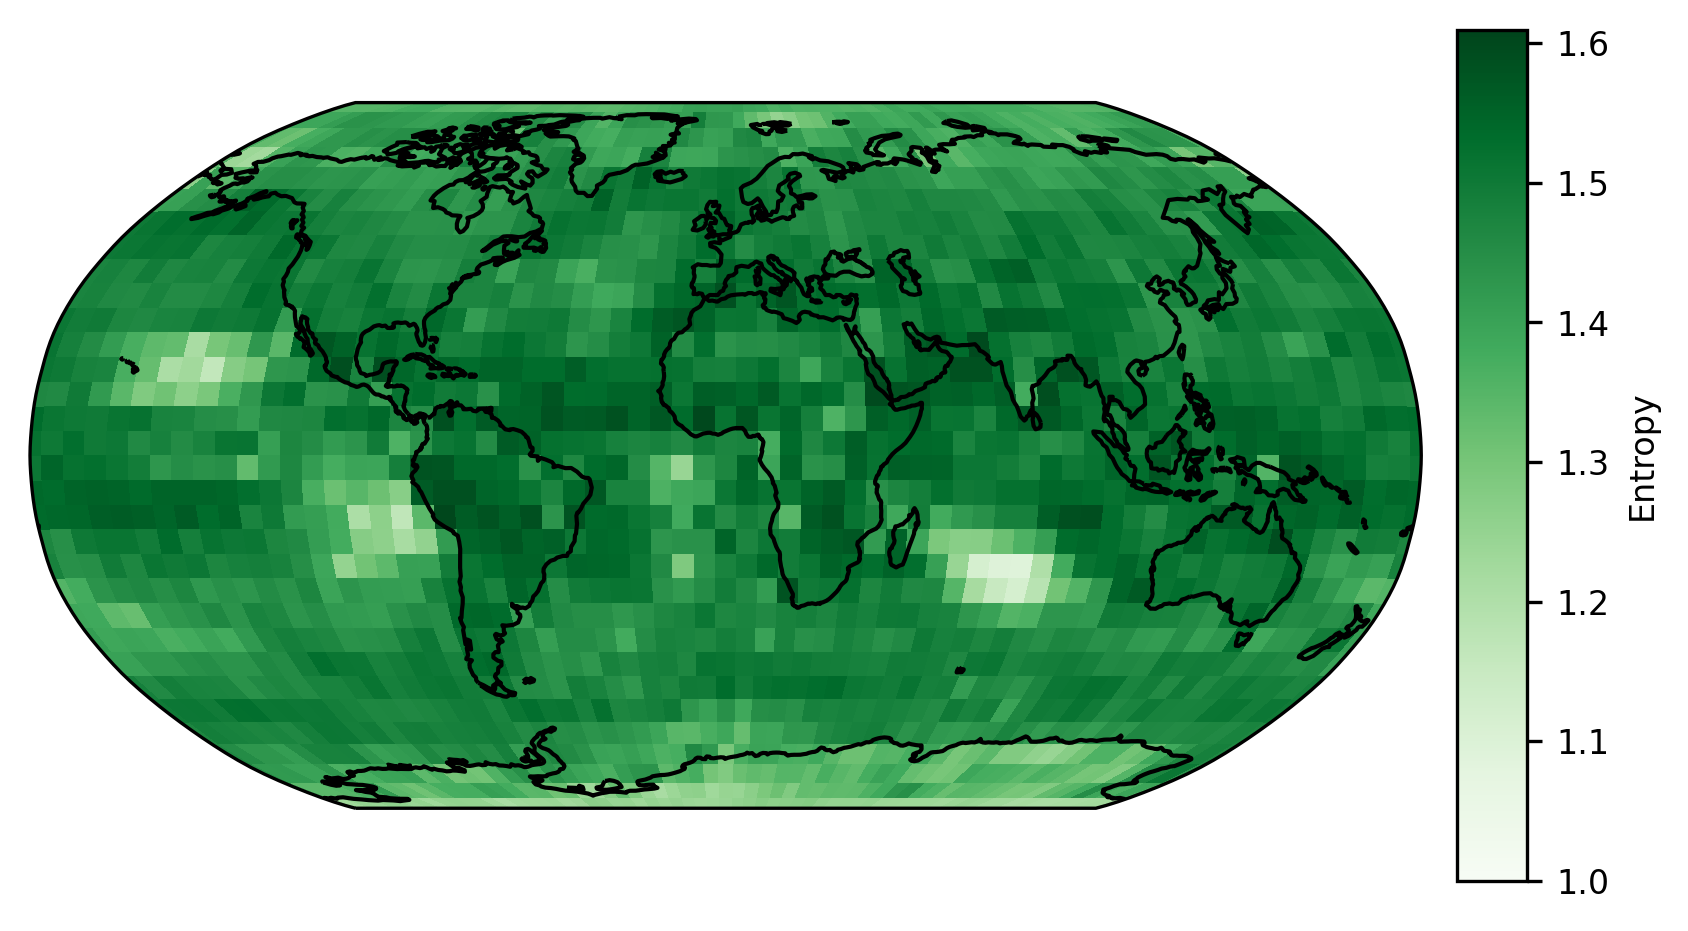

In [78]:
n_rows=1
n_cols=1

figure_width = textwidth
# calculate height from number of rows, cols and aspect ratio (+ do some fine tuning)
figure_height = textwidth * (n_rows / n_cols) / config["ASPECT_RATIO"]

fig = plt.figure(figsize = [figure_width, figure_height])
gs = gridspec.GridSpec(n_rows, n_cols+1, figure=fig, width_ratios=[1,0.05])


ax = fig.add_subplot(gs[0], projection=config["PROJECTION"])
# plot the map:
plot_map(ax, data=S[["t2m"]], plotting_config=config)

ax_cb=plt.subplot(gs[:,n_cols])  # create colorbar in extra column we created earlier
cbar = plt.colorbar(mappable=matplotlib.cm.ScalarMappable(cmap=config["CMAP"], norm=config["NORM"]), cax=ax_cb, extend=config["CBAR_EXTEND"])
cbar.set_label(config["CBAR_LABEL"])

fig.canvas.draw()
fig.tight_layout()

plt.show()

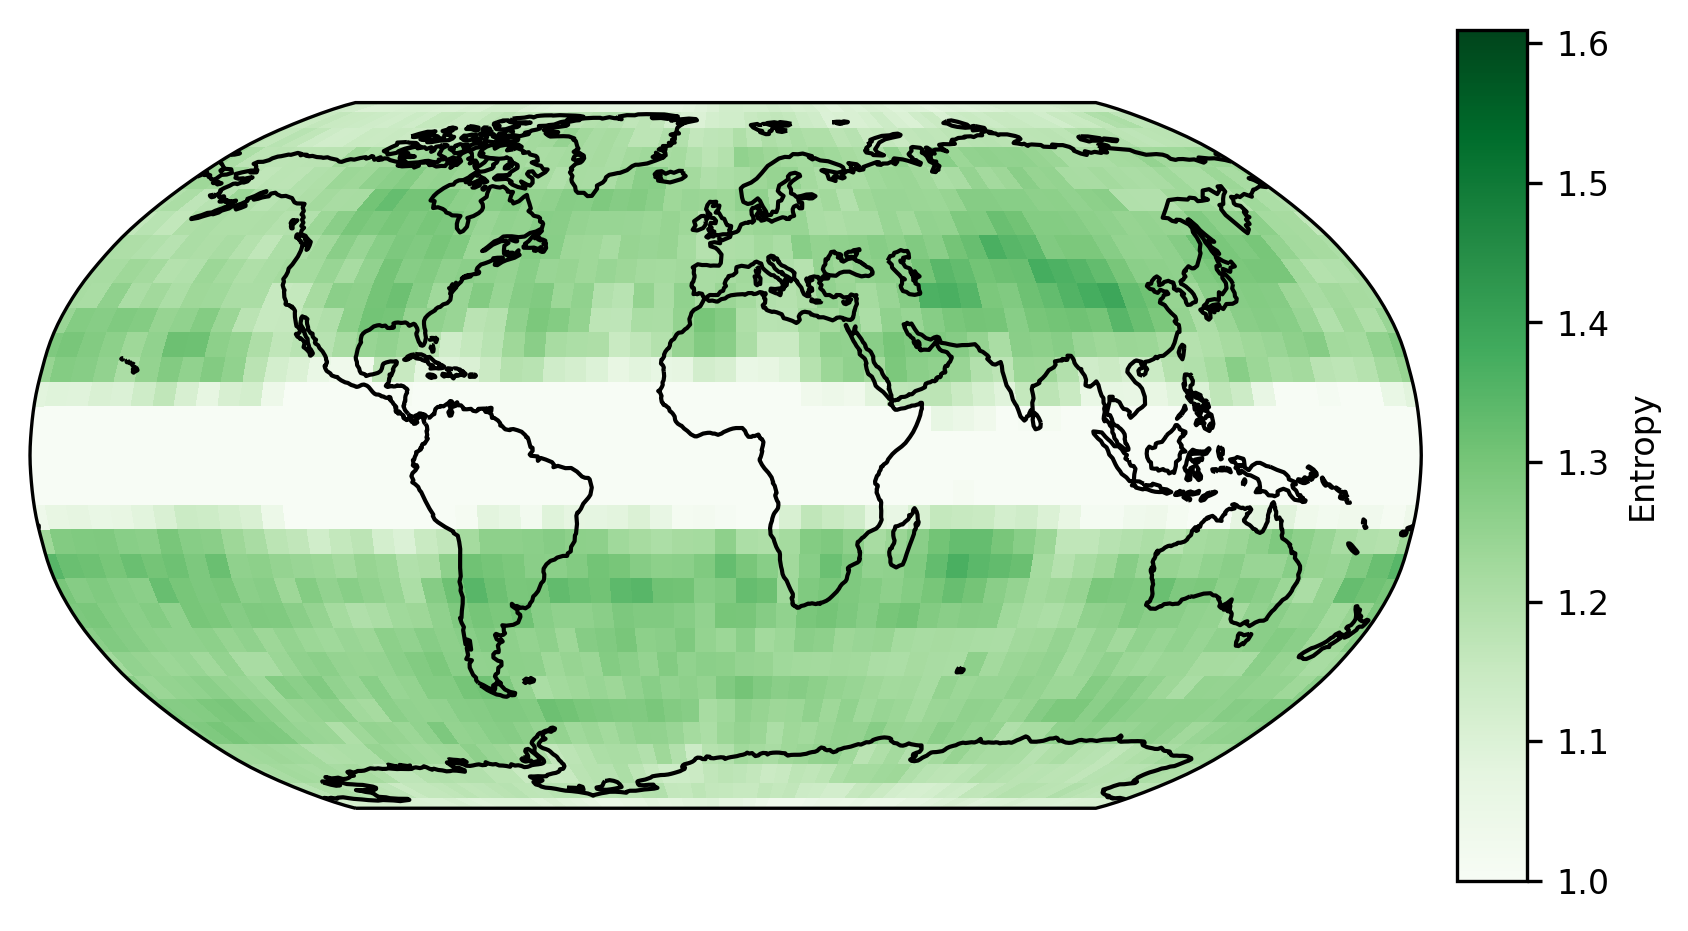

In [79]:
n_rows=1
n_cols=1

figure_width = textwidth
# calculate height from number of rows, cols and aspect ratio (+ do some fine tuning)
figure_height = textwidth * (n_rows / n_cols) / config["ASPECT_RATIO"]

fig = plt.figure(figsize = [figure_width, figure_height])
gs = gridspec.GridSpec(n_rows, n_cols+1, figure=fig, width_ratios=[1,0.05])


ax = fig.add_subplot(gs[0], projection=config["PROJECTION"])
# plot the map:
plot_map(ax, data=S[["z"]], plotting_config=config)

ax_cb=plt.subplot(gs[:,n_cols])  # create colorbar in extra column we created earlier
cbar = plt.colorbar(mappable=matplotlib.cm.ScalarMappable(cmap=config["CMAP"], norm=config["NORM"]), cax=ax_cb, extend=config["CBAR_EXTEND"])
cbar.set_label(config["CBAR_LABEL"])

fig.canvas.draw()
fig.tight_layout()

plt.show()

In [80]:
ranks.lat

<xarray.DataArray 'lat' (lat: 32)>
array([-87.1875, -81.5625, -75.9375, -70.3125, -64.6875, -59.0625, -53.4375,
       -47.8125, -42.1875, -36.5625, -30.9375, -25.3125, -19.6875, -14.0625,
        -8.4375,  -2.8125,   2.8125,   8.4375,  14.0625,  19.6875,  25.3125,
        30.9375,  36.5625,  42.1875,  47.8125,  53.4375,  59.0625,  64.6875,
        70.3125,  75.9375,  81.5625,  87.1875])
Coordinates:
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19

In [75]:
ranks.sel({"lat":2.8125}).z

<xarray.DataArray 'z' (lon: 64, rank: 5)>
array([[  72,   79,  122,  225, 2405],
       [  53,   56,  103,  194, 2497],
       [  43,   59,  102,  192, 2507],
       [  51,   54,  125,  232, 2441],
       [  57,   72,  118,  252, 2404],
       [  64,   84,  124,  247, 2384],
       [  59,  110,  138,  287, 2309],
       [  68,   92,  161,  269, 2313],
       [  70,  111,  142,  322, 2258],
       [  80,  112,  169,  303, 2239],
       [ 113,  121,  169,  312, 2188],
       [  90,  153,  195,  301, 2164],
       [  91,  137,  192,  314, 2169],
       [ 100,  121,  176,  335, 2171],
       [ 107,  142,  151,  336, 2167],
       [ 123,  137,  183,  311, 2149],
       [ 129,  146,  166,  287, 2175],
       [ 119,  142,  139,  262, 2241],
       [  85,   81,  139,  240, 2358],
       [  82,   85,  132,  244, 2360],
...
       [  33,   50,  101,  219, 2500],
       [  36,   40,   84,  213, 2530],
       [  36,   46,   99,  217, 2505],
       [  49,   54,   94,  232, 2474],
       [  49,   71,  124,  217, 2442],
       [  38,   63,  103,  230, 2469],
       [  34,   53,   87,  193, 2536],
       [  27,   58,   95,  236, 2487],
       [  32,   63,  105,  203, 2500],
       [  37,   62,   90,  183, 2531],
       [  42,   37,   93,  154, 2577],
       [  36,   41,   70,  131, 2625],
       [  36,   45,   66,  128, 2628],
       [  45,   47,   84,  171, 2556],
       [  44,   66,  102,  160, 2531],
       [  55,   71,   87,  213, 2477],
       [  48,   62,  110,  219, 2464],
       [  48,   61,   90,  212, 2492],
       [  50,   66,   98,  204, 2485],
       [  69,   89,  107,  203, 2435]])
Coordinates:
    lat      float64 2.812
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * rank     (rank) float64 1.0 2.0 3.0 4.0 5.0

it seems that this model systematically gives to low values for z_500 in the tropics.

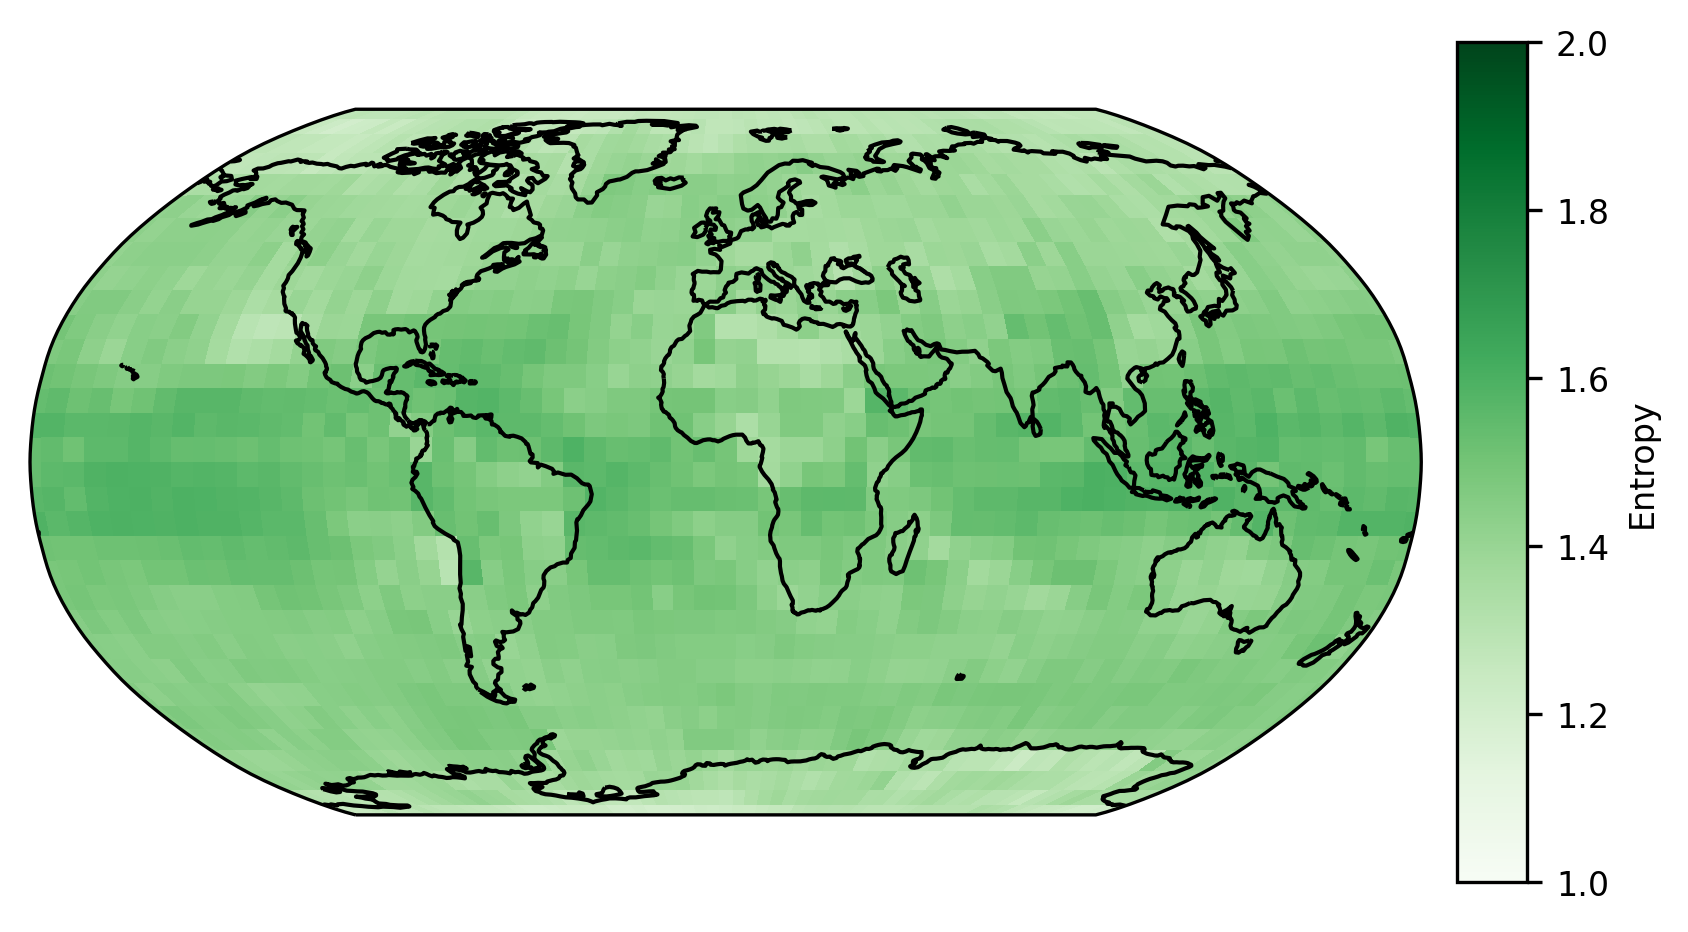

In [69]:
n_rows=1
n_cols=1

figure_width = textwidth
# calculate height from number of rows, cols and aspect ratio (+ do some fine tuning)
figure_height = textwidth * (n_rows / n_cols) / config["ASPECT_RATIO"]

fig = plt.figure(figsize = [figure_width, figure_height])
gs = gridspec.GridSpec(n_rows, n_cols+1, figure=fig, width_ratios=[1,0.05])


ax = fig.add_subplot(gs[0], projection=config["PROJECTION"])
# plot the map:
plot_map(ax, data=S[["t"]], plotting_config=config)

ax_cb=plt.subplot(gs[:,n_cols])  # create colorbar in extra column we created earlier
cbar = plt.colorbar(mappable=matplotlib.cm.ScalarMappable(cmap=config["CMAP"], norm=config["NORM"]), cax=ax_cb, extend=config["CBAR_EXTEND"])
cbar.set_label(config["CBAR_LABEL"])

fig.canvas.draw()
fig.tight_layout()

plt.show()